# Statistik

## Import af moduler

In [1]:
import tools
from importlib import reload
reload(tools)
import pprint
pp = pprint.PrettyPrinter(indent=2)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from copy import copy
from IPython.display import display, Markdown, Latex, Image
import seaborn as sns
#sns.set(style="whitegrid", palette="pastel", color_codes=True)


## Udtrækning af prøve

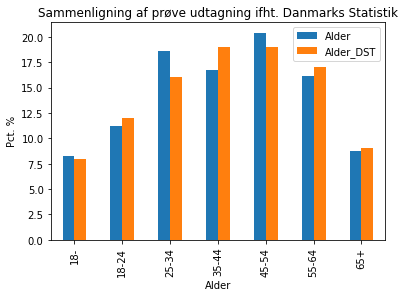

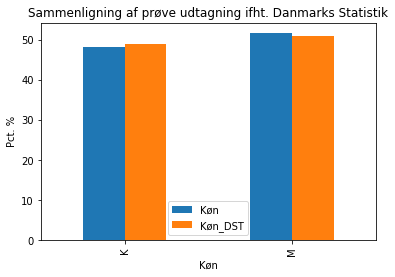

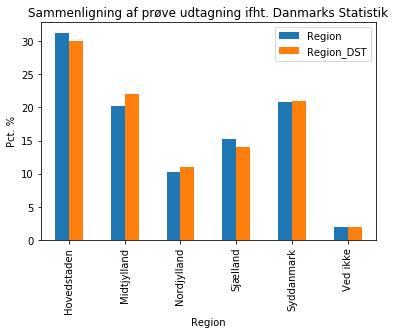

In [2]:
# Udtræk prøve
N = 1000
df, df_i = tools.get_std_sample(N=N)
# Sammenlign prøve
for key in df_i.keys():
    ax = df_i[key].plot.bar(title='Sammenligning af prøve udtagning ifht. Danmarks Statistik')
    ax.set_ylabel("Pct. %")
plt.show()

## Se eksempel på den trukne prøve

In [3]:
print("Der er %i prøver"%len(df.index))
df.head()

Der er 1000 prøver


,Alder,Køn,Region,Alle,val
0,55-64,K,Hovedstaden,Alle,1.0
1,45-54,M,Syddanmark,Alle,1.0
2,35-44,K,Syddanmark,Alle,1.0
3,65+,K,Hovedstaden,Alle,1.0
4,25-34,K,Syddanmark,Alle,1.0


# Anvendt notation
Den matematiske notation der efterfølgende anvendes, er taget fra *"An introduction to Error Analysis - The study of uncertainties in physical measurements"*, skrevet af John. R. Taylor. 

$$
\begin{aligned}
\text{Målt værdi af }x &= x_{\mathrm{bedste}} \pm \delta x \\
x_{\mathrm{bedste}} &= \text{bedste bud på }x = \text{gennemsnit af }x = \bar{x} = \frac{1}{N}\sum_{i=1}^N x_i \\
\delta x &= \text{absolut usikkerhed / absolut fejl / fejlmargen  af }x. \\
&\quad \text{Justeres så 95% af målinger falder indenfor } x_{\mathrm{bedste}} \pm \delta x \\
\epsilon_x &= \text{relativ usikkerhed / præcision af }x. \epsilon_x= \frac{\delta x}{|x_{\mathrm{bedste}}|} \text{ eller } \epsilon_x= \frac{\sigma_x}{|\bar{x}|}\\
&\quad \text{Læg mærke til at relativ usikkehed ikke har en enhed.} \\
Var(x) &= \sigma_x^2 = \text{varians af } x = \frac{1}{N-1}\sum(x_i - \bar{x})^2 \\
\sigma_x &= \text{standardarvigelse / spredning af } x = \sqrt{Var(x)} = \sqrt{\sigma_x^2}
\end{aligned} \\
$$

In [4]:
display(Image(url="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/440px-Boxplot_vs_PDF.svg.png"))

# Lav data til at teste

In [5]:
# Lav en serie. Her er højde på 180 cm, med en relativ usikkerhed på 5%
s = tools.create_rand_series(df=df, mu=180, ex=0.05)
df.loc[s.index, 'val'] = s

Hvis den relative usikkerhed er 5%, hvad er så den absolutte usikkerhed hvis gennemsnittet er 180 cm?

## Plot af histogram af datapunkter og normalfordeling

Normalfordelingen er beskrevet ved: $ x_{\mathrm{bedste}} $=180.17, $\sigma_x$=8.8

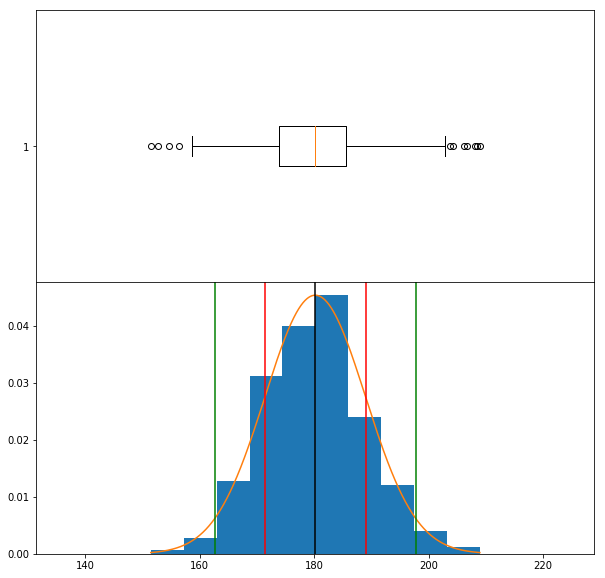

In [6]:
# Plot histogram af punkters
f, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10), sharex=True)
f.subplots_adjust(hspace=0)

v = df['val']
_=ax1.boxplot(v, notch=False, sym=None, vert=False)

mean = np.mean(v)
sigma = np.std(v)
x = np.linspace(min(v), max(v), len(v))
# Plot
ax2.hist(v, normed=True)
ax2.plot(x, mlab.normpdf(x, mean, sigma))
ax2.axvline(x=mean, c="k")
ax2.axvline(x=mean+sigma, c="r")
ax2.axvline(x=mean-sigma, c="r")
ax2.axvline(x=mean+2*sigma, c="g")
ax2.axvline(x=mean-2*sigma, c="g")
display(Markdown('Normalfordelingen er beskrevet ved: $ x_{\mathrm{bedste}} $=%1.2f, $\sigma_x$=%1.1f'%(mean, sigma)))

set_xlim = (x[0]-20, x[-1]+20)
_= ax1.set_xlim(set_xlim)

## Lav boxplots

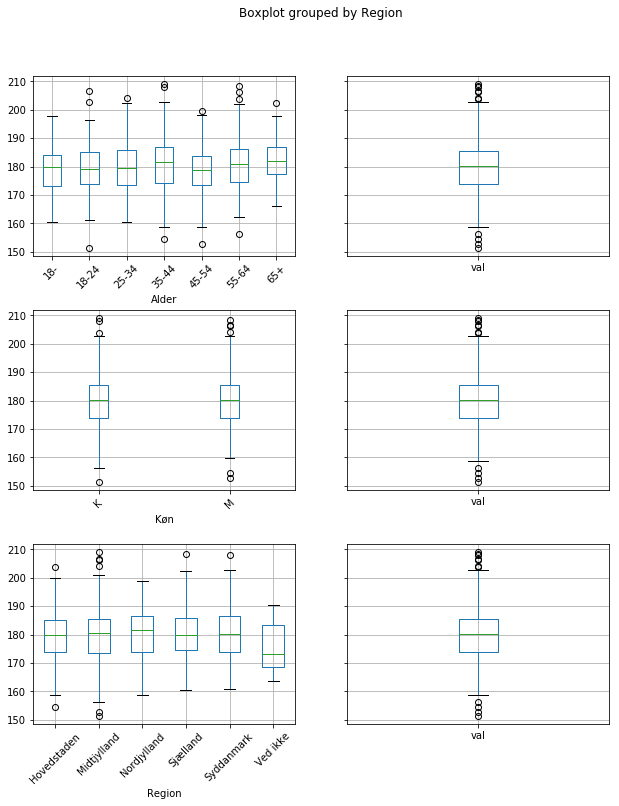

In [7]:
f, axes = plt.subplots(3,2, figsize=(10,12), sharey=True)
f.subplots_adjust(hspace=0.3)

for i, key in enumerate(df_i.keys()):
    ax = axes[i][0]
    ax2 = axes[i][1]
    df.boxplot(column='val', by=key, ax=ax, rot=45)
    df.boxplot(column='val', ax=ax2)
    ax.set_title("")
plt.show()

## Lav nye værdier

In [8]:
# Lave en kopi
df2 = copy(df)
# Vælg Midtjylland
df2_mj = df[df['Region'] == "Midtjylland"]
# Lav en serie. Her er højde på 190 cm, med en relativ usikkerhed på 5%
s = tools.create_rand_series(df=df2_mj, mu=200, ex=0.05)
df2.loc[s.index, 'val'] = s

Normalfordelingen er beskrevet ved: $ x_{\mathrm{bedste}} $=184.11, $\sigma_x$=12.0

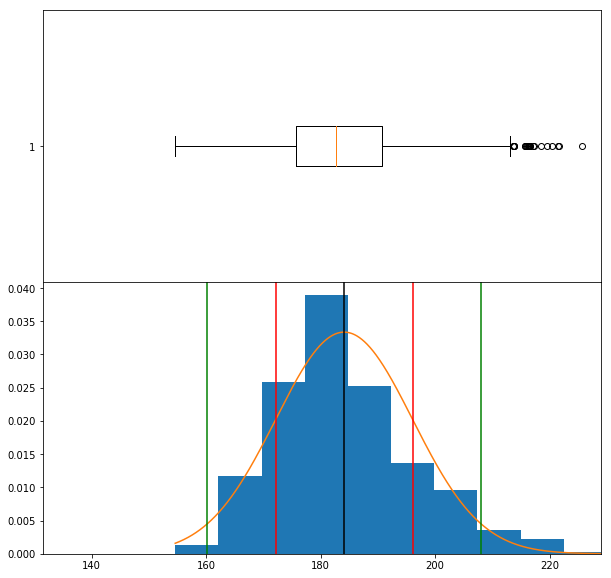

In [9]:
# Plot histogram af punkters
f, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10), sharex=True)
f.subplots_adjust(hspace=0)

v = df2['val']
_=ax1.boxplot(v, notch=False, sym=None, vert=False)

mean = np.mean(v)
sigma = np.std(v)
x = np.linspace(min(v), max(v), len(v))
# Plot
ax2.hist(v, normed=True)
ax2.plot(x, mlab.normpdf(x, mean, sigma))
ax2.axvline(x=mean, c="k")
ax2.axvline(x=mean+sigma, c="r")
ax2.axvline(x=mean-sigma, c="r")
ax2.axvline(x=mean+2*sigma, c="g")
ax2.axvline(x=mean-2*sigma, c="g")
display(Markdown('Normalfordelingen er beskrevet ved: $ x_{\mathrm{bedste}} $=%1.2f, $\sigma_x$=%1.1f'%(mean, sigma)))

_= ax1.set_xlim(set_xlim)

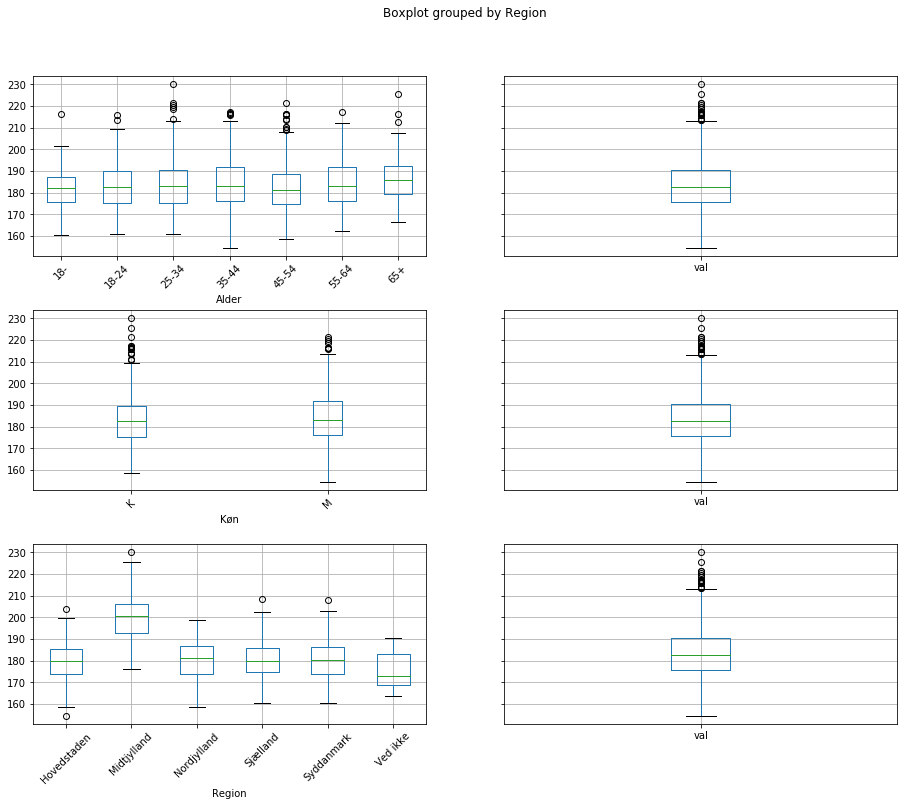

In [10]:
f, axes = plt.subplots(3,2, figsize=(15,12), sharey=True)
f.subplots_adjust(hspace=0.3)

for i, key in enumerate(df_i.keys()):
    ax = axes[i][0]
    ax2 = axes[i][1]
    df2.boxplot(column='val', by=key, ax=ax, rot=45)
    df2.boxplot(column='val', ax=ax2)
    ax.set_title("")
plt.show()

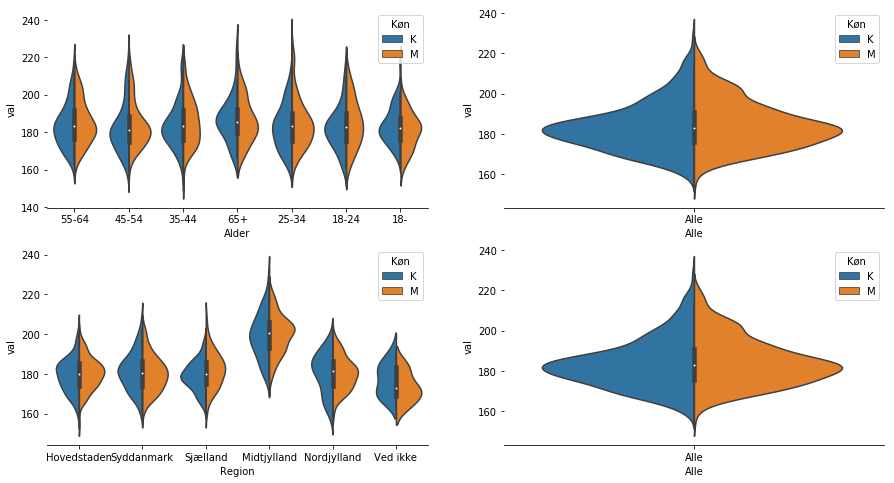

In [11]:
# Set up the matplotlib figure
f, axes = plt.subplots(2,2, figsize=(15,8))
sns.violinplot(x='Alder', y="val", hue="Køn", data=df2, split=True, ax=axes[0][0])
sns.violinplot(x='Alle', y="val", hue="Køn", data=df2, split=True, ax=axes[0][1])
sns.violinplot(x="Region", y="val", hue="Køn", data=df2, split=True, ax=axes[1][0])
sns.violinplot(x="Alle", y="val", hue="Køn", data=df2, split=True, ax=axes[1][1])
sns.despine(left=True)

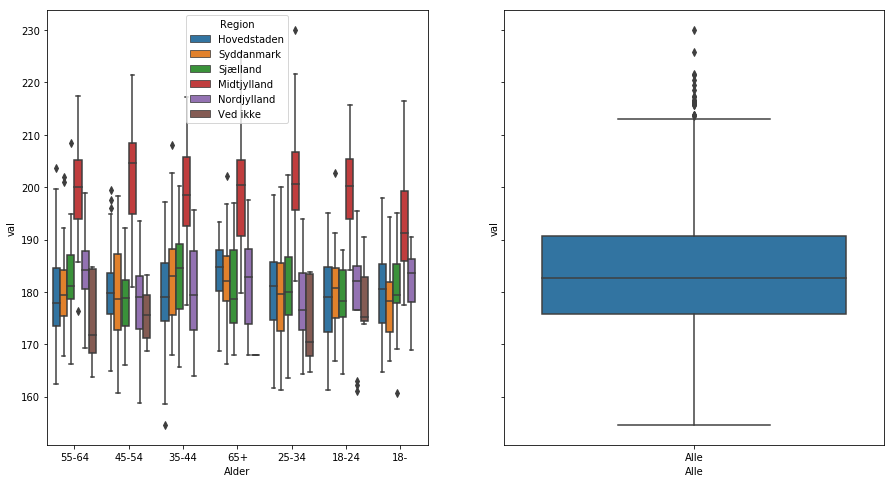

In [12]:
f, axes = plt.subplots(1,2, figsize=(15,8), sharey=True)
sns.boxplot(x='Alder', y="val", hue="Region", data=df2, ax=axes[0])#, palette="PRGn")
sns.boxplot(x='Alle', y="val", data=df2, ax=axes[1])#, palette="PRGn")